In [3]:
# Import ODE Solver
include("../ode_solver.jl")
using PlotlyJS

Function Definition

In [4]:
"""
dx/dt = x
"""

function f(x, t)
    return x
end

f (generic function with 1 method)

Plot of approximation methods compared to solution

In [12]:
t = 0:0.1:3
x0 = [1]
deltat_max = 0.01

@time s1 = solve_ode(f, x0, t, euler_step, deltat_max)[:,1]
@time s2 = solve_ode(f, x0, t, rk4_step, deltat_max)[:,1]

# Create traces
euler = scatter(x=t, y=s1, mode="lines", name="euler")
rk4 = scatter(x=t, y=s2, mode="lines", name="rk4")
solution = scatter(x=0:0.01:3, y=exp.(0:0.01:3), mode="lines", name="solution (e^(x))")

plot([euler, rk4, solution])

  0.000123 seconds (3.94 k allocations: 96.297 KiB)
  0.000225 seconds (10.46 k allocations: 198.859 KiB)


data: [
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y"
]

layout: "layout with fields margin and template"

Error Plot

In [25]:
x0 = [1.]
t = [0, 1]

# Euler estimate of x(1)
deltat_max = 0.001
@time solution = solve_ode(f, x0, t, euler_step, deltat_max)
println("Euler approximation = ", solution[end][1])


# RK4 estimate of x(1)
deltat_max = 0.001
@time solution = solve_ode(f, x0, t, rk4_step, deltat_max)
println("RK4 approximation = ", solution[end][1])

x0 = [1.]
t = [0, 1]
deltat_max = exp10.(range(-5,0,80))
real = exp(1)

euler_error = Any[]
rk4_error = Any[]

for value in deltat_max
    euler_sol = solve_ode(f, x0, t, euler_step, value)[end][1]
    push!(euler_error, abs.(euler_sol .- real))

    rk4_sol = solve_ode(f, x0, t, rk4_step, value)[end][1]
    push!(rk4_error, abs.(rk4_sol .- real))
end

  0.000343 seconds (12.01 k allocations: 281.812 KiB)
Euler approximation = 2.7169239322358942
  0.000689 seconds (33.03 k allocations: 610.781 KiB)
RK4 approximation = 2.718281828459023


In [34]:
t1 = scatter(x=deltat_max, y=euler_error, mode="lines", name="Euler")
t2 = scatter(x=deltat_max, y=rk4_error , mode="lines", name="RK4")
layout = Layout(
    xaxis_type="log",
    xaxis_exponentformat="power",
    xaxis_title="Δt",
    yaxis_type="log",
    yaxis_exponentformat="power",
    yaxis_title="error",
    width=700, height=350,
    )
data = [t1, t2]

plot(data, layout)

data: [
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y"
]

layout: "layout with fields height, margin, template, width, xaxis, and yaxis"

ODE Systems Extensions

In [7]:
"""
System of equations definitions for
    d^2x/dt^2 = -x,
equivalent to the system of equations
    dx/dt = y and dy/dt = -x.
"""

function f2(u, t)

    if(!isapprox(length(u), 2.0; atol=eps(Float64), rtol=0))
        throw(error("Please make sure you have entered two initial conditions for the function."))
    end

    x = u[1]    
    y = u[2]
    
    x_dot = y
    y_dot = -x
    
    return [x_dot y_dot]
end

function f2_solution(u, t)

    c1 = u[1]    
    c2 = u[2]

    x = c1*sin.(t) + c2*cos.(t)
    y = c1*cos.(t) - c2*sin.(t)

    return [x y]

end

f2_solution (generic function with 1 method)

Generate solution and estimate data for error plots

In [8]:
u = [1 0]
t = 0:2:100
real_t = 0:0.1:100
s = solve_ode(f2, u, t, rk4_step, 0.001);
real_s = f2_solution(u,real_t);

x = s[:,1];
x_dot = s[:,2];
x_sol = real_s[:,1];
x_dot_sol = real_s[:,2];

Plot of solution and estimate for x versus t

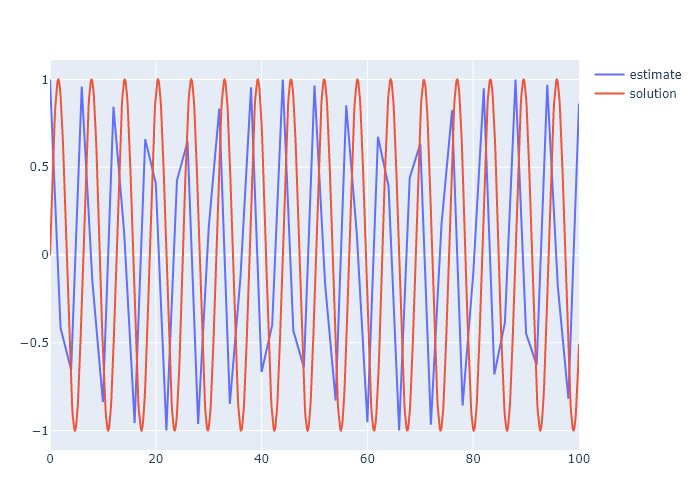

In [9]:
estimate = scatter(x=t, y=x, mode="lines",name="estimate")
solution = scatter(x=real_t, y=x_sol, mode="lines",name="solution")

plot([estimate, solution])

Plot of solution and estimate for x versus x_dot

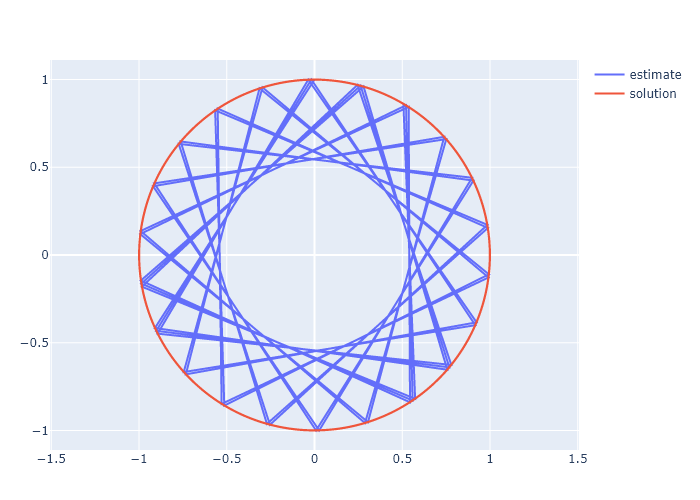

In [10]:
estimate = scatter(x=x_dot, y=x, mode="lines",name="estimate")
solution = scatter(x=x_dot_sol, y=x_sol, mode="lines",name="solution")
layout = Layout(yaxis=attr(scaleanchor = "x",scaleratio = 1))

plot([estimate, solution], layout)